### Importing  Libraries

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# KFold Cross Validation
from sklearn.model_selection import KFold,train_test_split

# ML LIBRARIES
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor

#STATMODELS
from statsmodels.api import OLS,add_constant

# Grid Search
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')



In [7]:
heart=pd.read_csv('~/downloads/Copy of heart_disease 11.csv')
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,ff
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes,NaN
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No,NaN
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No,NaN
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes,NaN
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No,NaN


In [5]:
heart.shape

(319795, 19)

There are 319795 rows and 19 coloumns.

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime,ff
count,319795.000000,319795.00000,319795.000000,319795.000000,0.0
mean,28.325399,3.37171,3.898366,7.097075,NaN
std,6.356100,7.95085,7.955235,1.436007,NaN
min,12.020000,0.00000,0.000000,1.000000,NaN
25%,24.030000,0.00000,0.000000,6.000000,NaN
50%,27.340000,0.00000,0.000000,7.000000,NaN
75%,31.420000,2.00000,3.000000,8.000000,NaN
max,94.850000,30.00000,30.000000,24.000000,NaN


Here, we are getting the 5 point summary of our data.

In [8]:
heart.isnull().sum()

HeartDisease             0
BMI                      0
Smoking                  0
AlcoholDrinking          0
Stroke                   0
PhysicalHealth           0
MentalHealth             0
DiffWalking              0
Sex                      0
AgeCategory              0
Race                     0
Diabetic                 0
PhysicalActivity         0
GenHealth                0
SleepTime                0
Asthma                   0
KidneyDisease            0
SkinCancer               0
ff                  319795
dtype: int64

Here we see that there are no null values in the data.

In [9]:
heart.duplicated().value_counts()/len(heart)*100

False    94.347004
True      5.652996
dtype: float64

* There are 5.65% duplicate values in this data. Since we are dealing healthcare data these will not be treated as there is  chance that people may have similar symtoms.

In [10]:
heart.rename({'DiffWalking':'WalkingDifficulty'},axis=1,inplace=True)
heart.rename({'Sex':'Gender'},axis=1,inplace=True)
heart.rename({'Race':'Origin'},axis=1,inplace=True)
heart.rename({'PhysicalActivity':'Exercise'},axis=1,inplace=True)
heart.rename({'SkinCancer':'Cancer'},axis=1,inplace=True)


Renaming required columns for better understanding of the data.

After Renaming...

In [11]:
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,WalkingDifficulty,Gender,AgeCategory,Origin,Diabetic,Exercise,GenHealth,SleepTime,Asthma,KidneyDisease,Cancer,ff
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes,NaN
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No,NaN
2,No,26.58,Race,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No,NaN
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes,NaN
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No,NaN


In [12]:
heart.skew()

BMI               1.332431
PhysicalHealth    2.603973
MentalHealth      2.331112
SleepTime         0.679035
ff                     NaN
dtype: float64

* All the numeric columns are skewed.

<AxesSubplot:>

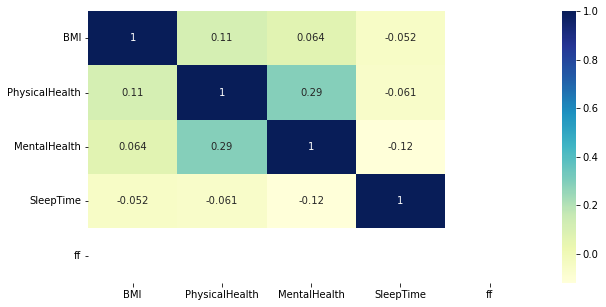

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(heart.corr(),annot=True,cmap='YlGnBu')

### Infrences from heatmap
* Physical Health and Mental Health seems to have good Correlation.
* BMI also have positive correaltion with Physical and Mnetal Health.

**Checking for NUMERICAL COLUMNS** 

In [14]:
num_cols=heart.select_dtypes(include=np.number).columns
num_cols

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'ff'], dtype='object')

**Checking for CATEGORICAL COLUMNS**

In [15]:
cat_cols=heart.select_dtypes(include='object').columns
cat_cols

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'WalkingDifficulty', 'Gender', 'AgeCategory', 'Origin', 'Diabetic',
       'Exercise', 'GenHealth', 'Asthma', 'KidneyDisease', 'Cancer'],
      dtype='object')

### UNIVARIATE ANALYSIS

 **Univariate Analysis on Numeric Data**

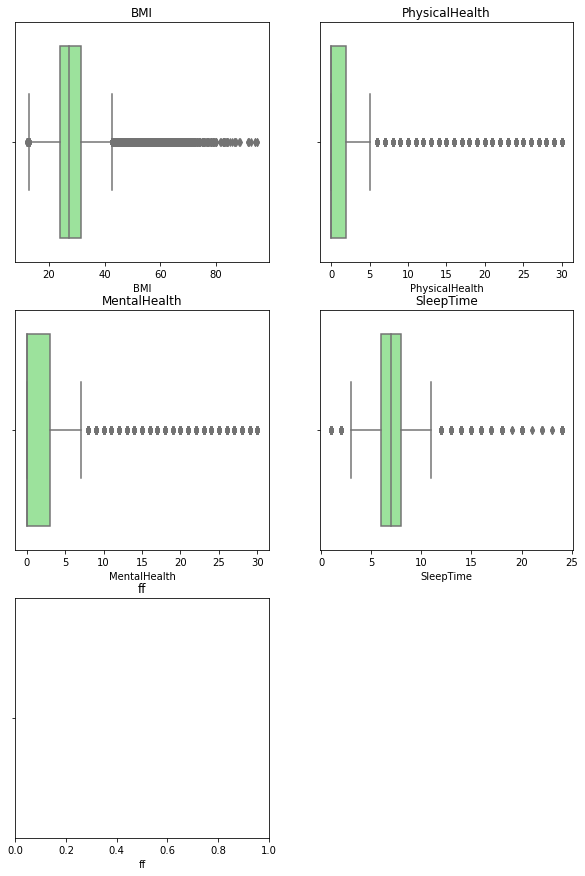

In [16]:
plt.figure(figsize=(10,15))
a=3
b=2
c=1

for i in num_cols:
    plt.subplot(a,b,c)
    sns.boxplot(heart.loc[:,i],color='lightgreen')
    c=c+1
    plt.title(i)

plt.tight_layout    
plt.show()

### Infrences after Univariate Analysis on the Numerical Columns
* Here, we are comparing all the numerical columns with each other.
* There is a presence of outliers and inliers in the data.
* Most of the columns in the data are positively skewed.

 **Univariate Analysis on Categorical Data**

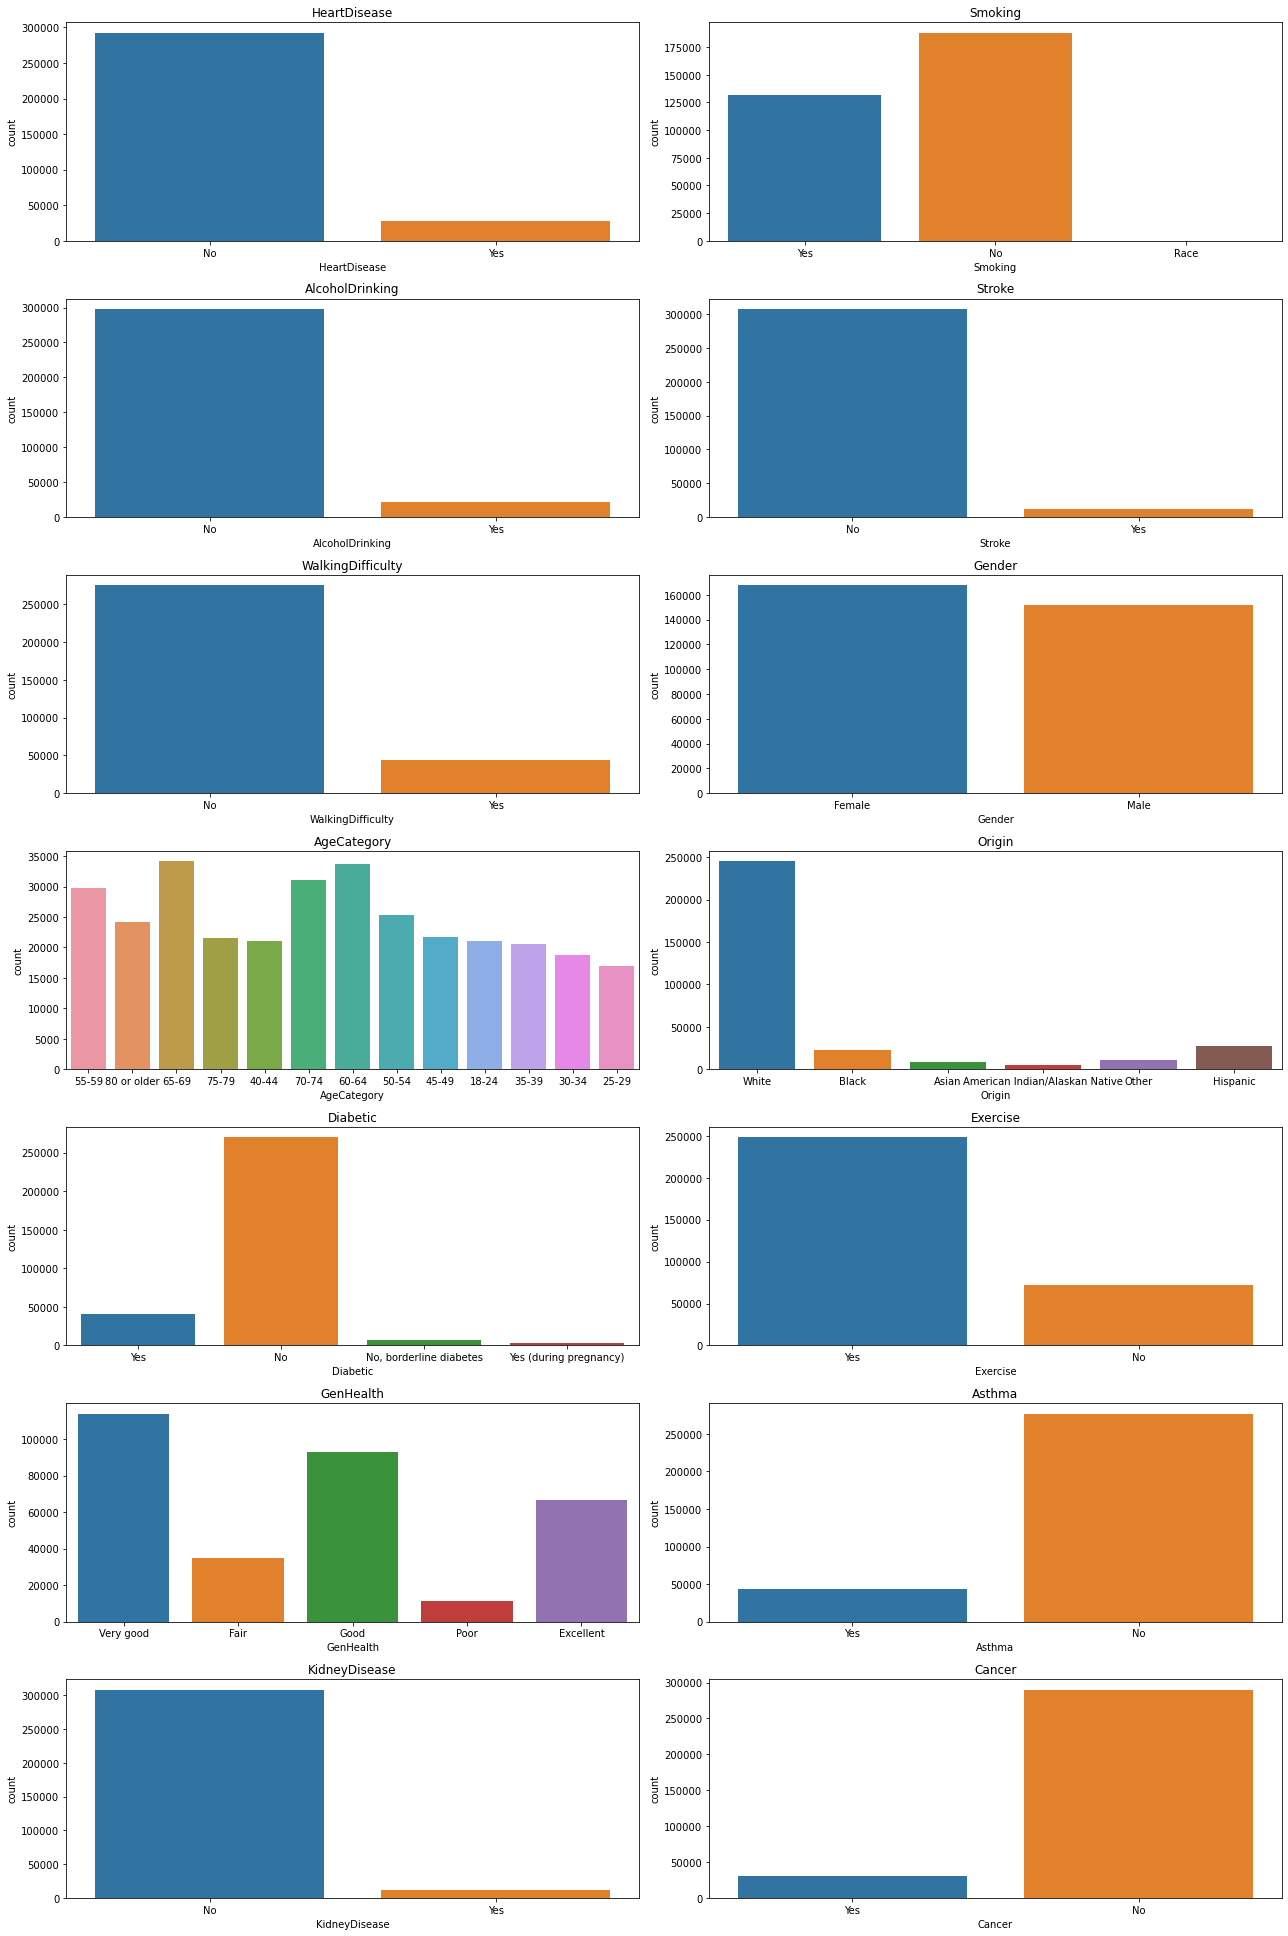

In [17]:
plt.figure(figsize=(18,27))
a=7
b=2
c=1

for i in cat_cols:
    plt.subplot(a,b,c)
    sns.countplot(heart.loc[:,i])
    c=c+1
    plt.title(i)
plt.tight_layout()   
plt.show()

### Infrences after Univariate Analysis on the Categorical Columns
Using Count plot for our analysis
* Majority people are suffering from heart disease.
* According, to the above analysis majority people are neither smoking and nor drinking alcohol.
* Number of people having stroke and suffering from walking difficulty is less.
* Heart disease are prominent in both men and women, but more in women.
* Our data consist of people of age category 18 to 80 or older.
* Majority people are not having Diabetes.
* Majority people are into exercise.
* General Health of majority people are very good and people are not having asthma.
* Majority people are neither have Kidney disease nor Cancer.


#### Making a copy of the data 

In [18]:
newheart=heart.copy()

#### Droping the ff Column from the data

In [19]:
newheart.drop('ff',axis=1,inplace=True)

In [20]:
num=newheart.select_dtypes(include=np.number).columns
num

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

In [373]:
cat=newheart.select_dtypes('object').columns
cat

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'WalkingDifficulty', 'Gender', 'AgeCategory', 'Origin', 'Diabetic',
       'Exercise', 'GenHealth', 'Asthma', 'KidneyDisease', 'Cancer'],
      dtype='object')

## Treating the outliers 

Before moving further, we will be treating all the ouliers in our data. We will be **CAPPING** the outliers.

##### num

In [22]:
for i in num:
    q1,q3 = np.quantile(newheart[i],[0.25,0.75])
    iqr = q3 - q1
    ul = q3+(1.5*iqr)
    ll = q1-(1.5*iqr)
    newheart.loc[newheart[i]>ul,i]=ul
    newheart.loc[newheart[i]<ll,i]=ll 
    

# Inference
* All the outliers in our data are treated using CAPPING METHOD.
* All the outliers are capped in the range of IQR . 
* Where outliers are treated with Upper limit [q3+(1.5*IQR] and inliers with lower limit [q1-  (1.5*IQR)].

###  Univariate Analysis after Capping the Outliers

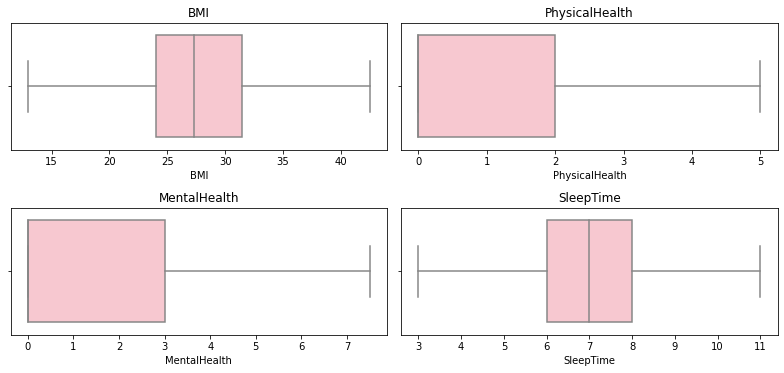

In [23]:
# Numerical Columns 
plt.figure(figsize = (11,10))
a = 4
b = 2
c = 1

for i in num:
    plt.subplot(a,b,c)
    sns.boxplot(newheart.loc[:,i],color = "pink")
    c = c+1
    plt.title(i)
plt.tight_layout()
plt.show()

* We can clearly see that all the outliers in the data have been capped.

### BIVARIATE ANALYSIS

**Bivariate Analysis on Numeric Column with heart Disease(Target Variable)**

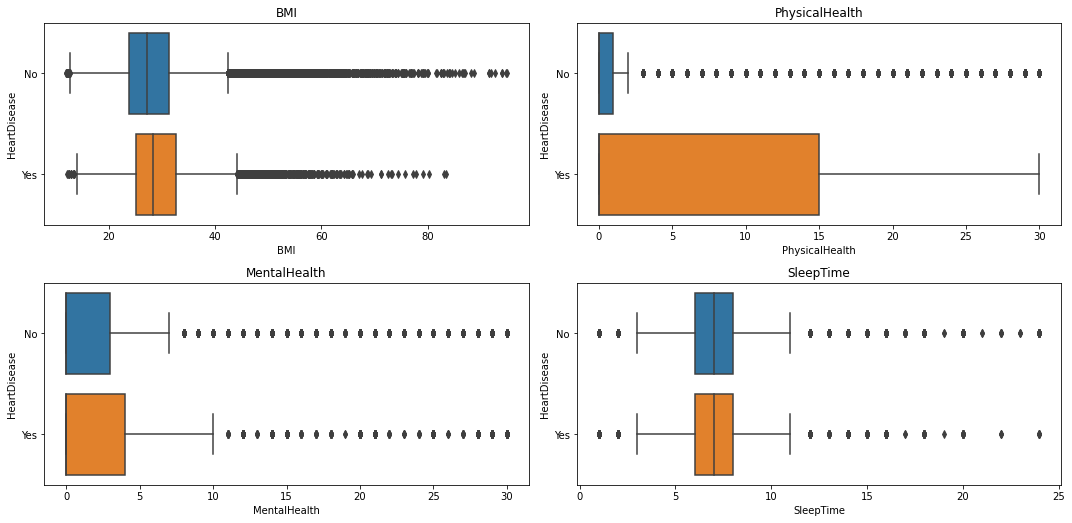

In [24]:
plt.figure(figsize=(15,25))
a=7
b=2
c=1

for i in num:
    plt.subplot(a,b,c)
    sns.boxplot(heart.loc[:,i],heart.loc[:,'HeartDisease'])
    c=c+1
    plt.title(i)
plt.tight_layout()    
plt.show()

# Inference
* BMI and sleep time does not seem to have much effect on target variable.
* People who does not  have good physical Health for 15 days are more prone to heart disease.
* People who does not have good Mental Health for 26 days are more prone to heart disease.

**Bivariate Analysis on Categorical Columns with heart Disease(Target Variable)**

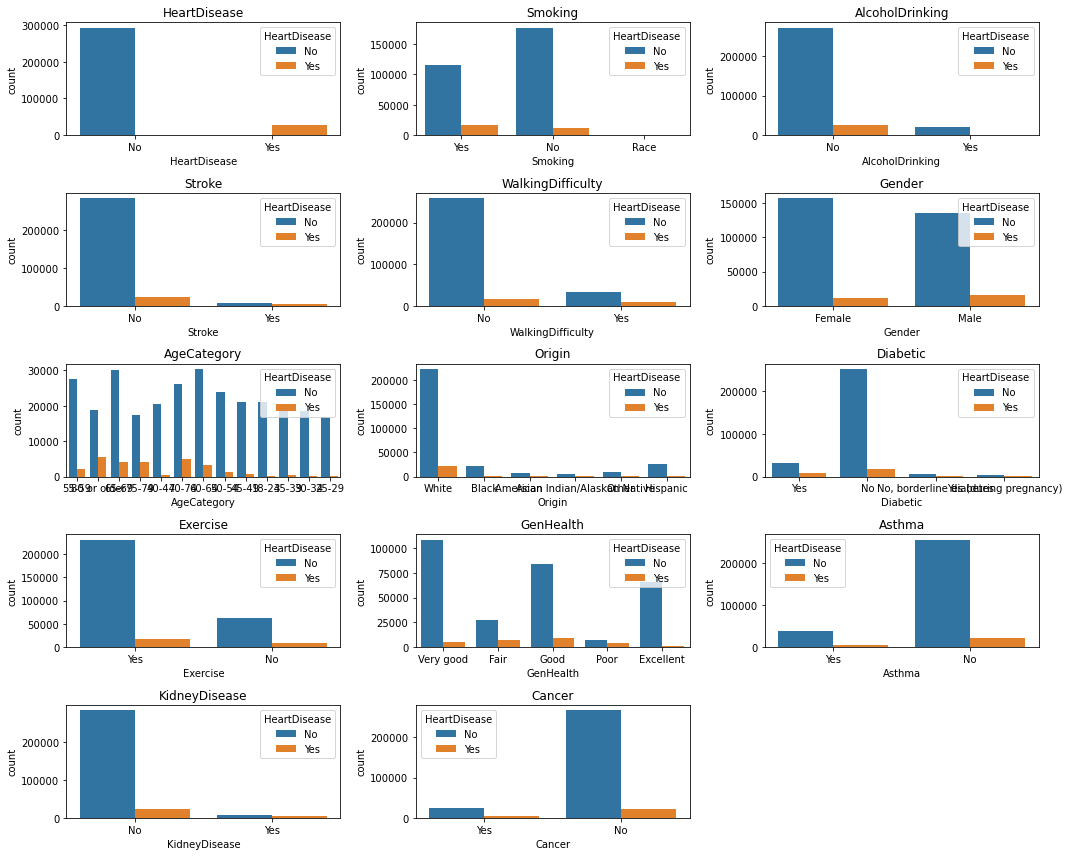

In [376]:
plt.figure(figsize=(15,12))
a = 5
b = 3
c = 1

for i in cat:
    plt.subplot(a,b,c)
    sns.countplot(heart.loc[:,i], hue=heart.loc[:,"HeartDisease"])
    c = c+1
    plt.title(i)
plt.tight_layout()    
plt.show()    

# Inference
* People who Smoke and drink Alcohol are having more chances of having Heart Disease.
* Males are having less chance of having heart disease.
* People who had stroke  and facing walking difficulty are having more chance of heart disease.
* People who 60 or older are more prone to heart disease.
* People who do not exercise  and have poor General Health have more chance of having heart disease.
* People suffering from  Diabetes, Asthma, Cancer and Kidney Disease are having more chance of having Heart Disease.
* White people are having more chance of having heart disease.

## Statistical Test

Here, We will be performimg Chi-Square Test for all categorical Coloum to check the significance importance of each coloum by considering there P-value. If the P-value is less than 0.05% then the column is significant.

1. SMOKING

In [38]:
tbl = pd.crosstab(newheart.Smoking , newheart.HeartDisease)
teststats , pvalue , df , exp_freq = stats.chi2_contingency(tbl)

print('P-value of Smoking Coloum =',pvalue)

P-value of Smoking Coloum = 0.0


**Smoking column is Statistically Significant.**

2. Alchol Drinking

In [39]:
tbl=pd.crosstab(newheart.AlcoholDrinking,newheart.HeartDisease)
teststats,pvalue,df,exp_freq=stats.chi2_contingency(tbl)


print('P-value of AlcholDrinking Coloum =',pvalue)

P-value of AlcholDrinking Coloum = 1.892352227090306e-73


**AlcholDrinking is Statistically Significant.**

3. Stroke

In [40]:
tbl=pd.crosstab(newheart.Stroke,newheart.HeartDisease)
teststats,pvalue,df,exp_freq=stats.chi2_contingency(tbl)


print('P-value of Stoke Coloum =',pvalue)

P-value of Stoke Coloum = 0.0


**Stroke is Statistically Significant.**

4. Walking Difficulty

In [41]:
tbl=pd.crosstab(newheart.WalkingDifficulty,newheart.HeartDisease)
teststats,pvalue,df,exp_freq=stats.chi2_contingency(tbl)

print('P-value of Walking Difficulty Coloum =',pvalue)

P-value of Walking Difficulty Coloum = 0.0


**WalkingDifficulty is Statistically Significant.**

5. Gender

In [42]:
tbl=pd.crosstab(newheart.Gender,newheart.HeartDisease)
teststats,pvalue,df,exp_freq=stats.chi2_contingency(tbl)

print('P-value of Gender Coloum =',pvalue)

P-value of Gender Coloum = 0.0


**Gender is Statistically Significant.**


6. Age Category

In [43]:
tbl=pd.crosstab(newheart.AgeCategory,newheart.HeartDisease)
teststats,pvalue,df,exp_freq=stats.chi2_contingency(tbl)

print('P-value of AgeCategory Coloum =',pvalue)

P-value of AgeCategory Coloum = 0.0


**AgeCategory is Statistically Significant.**

7. Origin

In [44]:
tbl=pd.crosstab(newheart.Origin,newheart.HeartDisease)
teststats,pvalue,df,exp_freq=stats.chi2_contingency(tbl)

print('P-value of Origin Coloum =',pvalue)

P-value of Origin Coloum = 2.9886131565632597e-180


**Origin is Statistically Significant.**

8. Diabetic

In [45]:
tbl=pd.crosstab(newheart.Diabetic,newheart.HeartDisease)
teststats,pvalue,df,exp_freq=stats.chi2_contingency(tbl)

print('P-value of Diabetic Coloum =',pvalue)

P-value of Diabetic Coloum = 0.0


**Diabetic is Statistically Significant.**

9. Exerxise

In [46]:
tbl=pd.crosstab(newheart.Exercise,newheart.HeartDisease)
teststats,pvalue,df,exp_freq=stats.chi2_contingency(tbl)

print('P-value of Exercise Coloum =',pvalue)

P-value of Exercise Coloum = 0.0


**Exercise is Statistically Significant.**

10. General Health

In [47]:
tbl=pd.crosstab(newheart.GenHealth,newheart.HeartDisease)
teststats,pvalue,df,exp_freq=stats.chi2_contingency(tbl)

print('P-value of GenHealth Coloum =',pvalue)

P-value of GenHealth Coloum = 0.0


**GenHealth is Statistically Significant.**

11. Asthma

In [48]:
tbl=pd.crosstab(newheart.Asthma,newheart.HeartDisease)
teststats,pvalue,df,exp_freq=stats.chi2_contingency(tbl)

print('P-value of Asthma Coloum =',pvalue)

P-value of Asthma Coloum = 2.2386144306283177e-121


**Asthma is Statistically Significant.**

12. Kidney Disease

In [49]:
tbl=pd.crosstab(newheart.KidneyDisease,newheart.HeartDisease)
#teststats,pvaluesthma is Statistically Significant.**,df,exp_freq=stats.chi2_contingency(tbl)

print('P-value of Diabetic Coloum =',pvalue)

P-value of Diabetic Coloum = 2.2386144306283177e-121


**KidenyDisease is Statistically Significant.**

13.Cancer

In [50]:
tbl=pd.crosstab(newheart.Cancer,newheart.HeartDisease)
teststats,pvalue,df,exp_freq=stats.chi2_contingency(tbl)

print('P-value of Cancer Coloum =',pvalue)

P-value of Cancer Coloum = 0.0


**Cancer is Statistically Significant.**

Since the Pvaue is less than alpha(0.05)
Hence, According to the Chi-Square Test all the categorical Columns are Statistically Significant.

## BINNING

Here, we are binninbg the required columns that are-:
* 1. AgeCategory
* 2. GenHealth
* 3. Origin

**Binning the AgeCategory Coloum**

In [51]:
newheart.AgeCategory.unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [52]:
b1=['18-24','25-29','30-34', '35-39','40-44']
b2=['45-49','50-54','55-59', '60-64']
b3=['65-69','75-79','70-74','75-79','80 or older']


def age(x):
    if x in b1:
        return('Young Age')
    elif x in b2:
        return('Middle Age')
    elif x in b3:
        return('Old age')

In [53]:
newheart['AgeCategory']=newheart.AgeCategory.apply(age)

In [54]:
newheart.AgeCategory.unique()

array(['Middle Age', 'Old age', 'Young Age'], dtype=object)

Here, We have Bin the the column AgeCategory in three classes Young Age,Middle Age and Old Age

**Binning the GenHealth Column**

In [55]:
newheart.GenHealth.unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [56]:
a=['Very good']
b=['Excellent','Good']
c=['Fair','Poor']



def health(x):
    if x in a:
        return('Very Good')
    elif x in b:
        return('Good')
    elif x in c:
        return('Fair')
        

In [57]:
newheart['GenHealth']=newheart.GenHealth.apply(health)

In [58]:
newheart.GenHealth.unique()

array(['Very Good', 'Fair', 'Good'], dtype=object)

Here, We have done the Binning of column GenHealth in three classes Very Good,Good and Fair.

**Binning the Origin Column.**

In [59]:
bin1=['White']
bin2=['Asian','Black','Hispanic']
bin3=['American Indian/Alaskan Native','Other']



def ori(x):
    if x in bin1:
        return('White')
    elif x in bin2:
        return('Black')
    elif x in bin3:
        return('Other')

In [60]:
newheart['Origin']=newheart.Origin.apply(ori)

In [61]:
newheart.Origin.unique()

array(['White', 'Black', 'Other'], dtype=object)

Here, We have done the Binning of column Origin in three classes White,Black and Other.

## Scaling the Numerical Columns in the data.

Here,we will be scalling all the numerical data in our dataset using the StandardScaler

In [62]:
# Importing the Standard Scaler
from sklearn.preprocessing import StandardScaler

In [63]:
# Initialising the Standard Scaler
sc=StandardScaler()

In [64]:
# Getting the numeric data 
num_data=newheart.select_dtypes(include=np.number)

In [65]:
## scaling the data
scaled_data = pd.DataFrame(sc.fit_transform(num_data),
                           columns=['BMI_scaled', 'PhysicalHealth_scaled', 'MentalHealth_scaled', 'SleepTime_scaled'])

#### Concating the scaled Data frame with the original data frame


In [66]:
final_data=pd.concat([scaled_data,newheart] , axis=1)

In [67]:
final_data

,BMI_scaled,PhysicalHealth_scaled,MentalHealth_scaled,SleepTime_scaled,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,...,Gender,AgeCategory,Origin,Diabetic,Exercise,GenHealth,SleepTime,Asthma,KidneyDisease,Cancer
0,-2.002522,0.976249,1.932050,-1.580688,No,16.600,Yes,No,No,3,...,Female,Middle Age,White,Yes,Yes,Very Good,5,Yes,No,Yes
1,-1.354063,-0.580460,-0.645307,-0.061484,No,20.340,No,No,Yes,0,...,Female,Old age,White,No,Yes,Very Good,7,No,No,No
2,-0.272142,2.014054,1.932050,0.698118,No,26.580,Race,No,No,5,...,Male,Old age,White,Yes,Yes,Fair,8,Yes,No,No
3,-0.683064,-0.580460,-0.645307,-0.821086,No,24.210,No,No,No,0,...,Female,Old age,White,No,No,Good,6,No,No,Yes
4,-0.769756,2.014054,-0.645307,0.698118,No,23.710,No,No,No,5,...,Female,Young Age,White,No,Yes,Very Good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,-0.128233,2.014054,-0.645307,-0.821086,Yes,27.410,Yes,No,No,5,...,Male,Middle Age,Black,Yes,No,Fair,6,Yes,No,No
319791,0.293092,-0.580460,-0.645307,-1.580688,No,29.840,Yes,No,No,0,...,Male,Young Age,Black,No,Yes,Very Good,5,Yes,No,No
319792,-0.677862,-0.580460,-0.645307,-0.821086,No,24.240,No,No,No,0,...,Female,Middle Age,Black,No,Yes,Good,6,No,No,No
319793,0.808045,-0.580460,-0.645307,2.976925,No,32.810,No,No,No,0,...,Female,Young Age,Black,No,No,Good,11,No,No,No


In [68]:
final_data.drop(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'] , axis = 1,inplace=True)

In [69]:
final_data

,BMI_scaled,PhysicalHealth_scaled,MentalHealth_scaled,SleepTime_scaled,HeartDisease,Smoking,AlcoholDrinking,Stroke,WalkingDifficulty,Gender,AgeCategory,Origin,Diabetic,Exercise,GenHealth,Asthma,KidneyDisease,Cancer
0,-2.002522,0.976249,1.932050,-1.580688,No,Yes,No,No,No,Female,Middle Age,White,Yes,Yes,Very Good,Yes,No,Yes
1,-1.354063,-0.580460,-0.645307,-0.061484,No,No,No,Yes,No,Female,Old age,White,No,Yes,Very Good,No,No,No
2,-0.272142,2.014054,1.932050,0.698118,No,Race,No,No,No,Male,Old age,White,Yes,Yes,Fair,Yes,No,No
3,-0.683064,-0.580460,-0.645307,-0.821086,No,No,No,No,No,Female,Old age,White,No,No,Good,No,No,Yes
4,-0.769756,2.014054,-0.645307,0.698118,No,No,No,No,Yes,Female,Young Age,White,No,Yes,Very Good,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,-0.128233,2.014054,-0.645307,-0.821086,Yes,Yes,No,No,Yes,Male,Middle Age,Black,Yes,No,Fair,Yes,No,No
319791,0.293092,-0.580460,-0.645307,-1.580688,No,Yes,No,No,No,Male,Young Age,Black,No,Yes,Very Good,Yes,No,No
319792,-0.677862,-0.580460,-0.645307,-0.821086,No,No,No,No,No,Female,Middle Age,Black,No,Yes,Good,No,No,No
319793,0.808045,-0.580460,-0.645307,2.976925,No,No,No,No,No,Female,Young Age,Black,No,No,Good,No,No,No


## Encoding the Categorical Columns

**Using The Label Encoder for all categorical colums except the columns where Binning is done.**

In [70]:
# Import the label Encoder
from sklearn.preprocessing import LabelEncoder

# Intialising the Label Encoder
Le=LabelEncoder()

In [71]:
final_data.select_dtypes(include='object').columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'WalkingDifficulty', 'Gender', 'AgeCategory', 'Origin', 'Diabetic',
       'Exercise', 'GenHealth', 'Asthma', 'KidneyDisease', 'Cancer'],
      dtype='object')

Now, selecting the categorical columns and applying the label encoder on it.

In [72]:
cat_label =['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke','WalkingDifficulty', 'Gender', 'Diabetic',
       'Exercise', 'Asthma', 'KidneyDisease', 'Cancer']

In [73]:
final_data[cat_label]=final_data[cat_label].apply(Le.fit_transform)

In [74]:
final_data.HeartDisease.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

**Encoding the the columns on which Binng is done using .replace function**

In [75]:
final_data.head()

,BMI_scaled,PhysicalHealth_scaled,MentalHealth_scaled,SleepTime_scaled,HeartDisease,Smoking,AlcoholDrinking,Stroke,WalkingDifficulty,Gender,AgeCategory,Origin,Diabetic,Exercise,GenHealth,Asthma,KidneyDisease,Cancer
0,-2.002522,0.976249,1.932050,-1.580688,0,2,0,0,0,0,Middle Age,White,2,1,Very Good,1,0,1
1,-1.354063,-0.580460,-0.645307,-0.061484,0,0,0,1,0,0,Old age,White,0,1,Very Good,0,0,0
2,-0.272142,2.014054,1.932050,0.698118,0,1,0,0,0,1,Old age,White,2,1,Fair,1,0,0
3,-0.683064,-0.580460,-0.645307,-0.821086,0,0,0,0,0,0,Old age,White,0,0,Good,0,0,1
4,-0.769756,2.014054,-0.645307,0.698118,0,0,0,0,1,0,Young Age,White,0,1,Very Good,0,0,0


In [76]:
final_data['AgeCategory'].replace({'Young Age': 0, 'Middle Age': 1,'Old age':2},inplace=True)

In Age Category column-: 
* Young Age is replaced by 0 
* Middle Age by 1
* Old Age by 2.

In [77]:
final_data['Origin'].replace({'White':0,'Black':1,'Other':2},inplace=True)

In Origin column-: 
* White is replaced by 0 
* Black Age by 1
* Other by 2.

In [78]:
final_data['GenHealth'].replace({'Very Good':0,'Good':1,'Fair':2},inplace=True)

In GenHealth column-: 
* Very Good is replaced by 0 
* Good by 1
* Fair by 2.

In [79]:
final_data.head()

,BMI_scaled,PhysicalHealth_scaled,MentalHealth_scaled,SleepTime_scaled,HeartDisease,Smoking,AlcoholDrinking,Stroke,WalkingDifficulty,Gender,AgeCategory,Origin,Diabetic,Exercise,GenHealth,Asthma,KidneyDisease,Cancer
0,-2.002522,0.976249,1.932050,-1.580688,0,2,0,0,0,0,1,0,2,1,0,1,0,1
1,-1.354063,-0.580460,-0.645307,-0.061484,0,0,0,1,0,0,2,0,0,1,0,0,0,0
2,-0.272142,2.014054,1.932050,0.698118,0,1,0,0,0,1,2,0,2,1,2,1,0,0
3,-0.683064,-0.580460,-0.645307,-0.821086,0,0,0,0,0,0,2,0,0,0,1,0,0,1
4,-0.769756,2.014054,-0.645307,0.698118,0,0,0,0,1,0,0,0,0,1,0,0,0,0


# Detection of Multi Collinearity 

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_list = []
# Loops to iterate columns
for i in range(final_data.shape[1]):
    vif_list.append(variance_inflation_factor(final_data.values,i))
    
vif = pd.DataFrame({"Features":final_data.columns,"VIF":vif_list})

vif.sort_values(ascending=True , by="VIF")

,Features,VIF
3,SleepTime_scaled,1.036931
0,BMI_scaled,1.092520
6,AlcoholDrinking,1.093555
16,KidneyDisease,1.103654
7,Stroke,1.117207
15,Asthma,1.185334
2,MentalHealth_scaled,1.187708
17,Cancer,1.195433
4,HeartDisease,1.258992
11,Origin,1.268153


# Inference
* Since VIF of all the variable columns is less than 10 .
* hence, there is no multi collinearty and all features are significant. 

Now, our data is ready for modelling.

In [380]:
final_data.head()

,BMI_scaled,PhysicalHealth_scaled,MentalHealth_scaled,SleepTime_scaled,HeartDisease,Smoking,AlcoholDrinking,Stroke,WalkingDifficulty,Gender,AgeCategory,Origin,Diabetic,Exercise,GenHealth,Asthma,KidneyDisease,Cancer
0,-2.002522,0.976249,1.932050,-1.580688,0,2,0,0,0,0,1,0,2,1,0,1,0,1
1,-1.354063,-0.580460,-0.645307,-0.061484,0,0,0,1,0,0,2,0,0,1,0,0,0,0
2,-0.272142,2.014054,1.932050,0.698118,0,1,0,0,0,1,2,0,2,1,2,1,0,0
3,-0.683064,-0.580460,-0.645307,-0.821086,0,0,0,0,0,0,2,0,0,0,1,0,0,1
4,-0.769756,2.014054,-0.645307,0.698118,0,0,0,0,1,0,0,0,0,1,0,0,0,0


# Train Test Split

In [707]:
from sklearn.model_selection import train_test_split

In [706]:
x = final_data.drop(columns=["HeartDisease"])
y = final_data["HeartDisease"]

In [708]:
x_train , x_test , y_train , y_test = train_test_split(x,y, train_size=0.7,random_state=10)

In [709]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(223856, 17) (95939, 17) (223856,) (95939,)


In [711]:
import statsmodels.api as sm

In [712]:
# Adding constant
X_train = sm.add_constant(x_train)
X_test = sm.add_constant(x_test)

# Base Model

In [725]:
base_model = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.233038
         Iterations 8


In [726]:
print(base_model.summary())

                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:               223856
Model:                          Logit   Df Residuals:                   223838
Method:                           MLE   Df Model:                           17
Date:                Thu, 22 Dec 2022   Pseudo R-squ.:                  0.2025
Time:                        04:55:53   Log-Likelihood:                -52167.
converged:                       True   LL-Null:                       -65417.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -5.1193      0.035   -147.822      0.000      -5.187      -5.051
BMI_scaled                0.0550      0.009      6.398      0.000       0.038       0.072
Physical

In [727]:
y_pred_prob = base_model.predict(X_test)

In [728]:
y_pred_prob

56517     0.026327
112447    0.015945
40550     0.023994
40682     0.011913
92585     0.060587
            ...   
173637    0.149942
235307    0.208340
113637    0.007386
212627    0.036652
192382    0.073908
Length: 95939, dtype: float64

In [729]:
from sklearn.metrics import confusion_matrix ,accuracy_score , recall_score , cohen_kappa_score , precision_score , classification_report , f1_score

In [730]:
# Creating Threshold 
y_pred = np.where(y_pred_prob>0.5,1,0) 

In [731]:
scores(y_test,y_pred)

Confusion Metrics:
 [[87004   723]
 [ 7381   831]]
Accuracy:  0.9155296594711223
Recall:  0.10119337554797857
Precision:  0.5347490347490348
F1 score:  0.17018226500102396
Cohen kappa Score:  0.14694444634563475
Classification Summary:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     87727
           1       0.53      0.10      0.17      8212

    accuracy                           0.92     95939
   macro avg       0.73      0.55      0.56     95939
weighted avg       0.89      0.92      0.89     95939



# Inference
* Therefore we can see that our data is imbalanced and biased toward zero (i.e. ‘NO: the person is not suffering from heart disease’ ). Therefore Balancing is required.

In [732]:
from sklearn.metrics import roc_auc_score , roc_curve

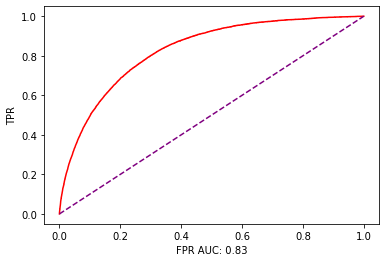

In [733]:
roc(y_test,y_pred_prob)

# Balancing the data

In [734]:
from imblearn.over_sampling import  SMOTE

In [735]:
over_samp = SMOTE()

In [736]:
x_train_os , y_train_os = over_samp.fit_resample(x_train,y_train)

In [737]:
y_train_os.value_counts()

0    204695
1    204695
Name: HeartDisease, dtype: int64

# Inference
* We need to balance our data. We decided to use SMOTE (that comes under over-sampling) to balance our data.
* SMOTE- Synthetic Minority Oversampling Technique is one of the most commonly used oversampling methods to solve the imbalance problem.It aims to balance class distribution by randomly increasing minority class examples by replicating them.


# Logistic Regression

In [738]:
from sklearn.linear_model import LogisticRegression

In [739]:
model_lr = LogisticRegression()

In [740]:
model_lr.fit(x_train_os,y_train_os)

LogisticRegression()

In [741]:
y_pred_lr = model_lr.predict(x_test)

In [742]:
scores(y_test,y_pred_lr)

Confusion Metrics:
 [[63376 24351]
 [ 1993  6219]]
Accuracy:  0.7254088535423551
Recall:  0.7573063809059912
Precision:  0.20343473994111874
F1 score:  0.3207157959878294
Cohen kappa Score:  0.2147524747478955
Classification Summary:
               precision    recall  f1-score   support

           0       0.97      0.72      0.83     87727
           1       0.20      0.76      0.32      8212

    accuracy                           0.73     95939
   macro avg       0.59      0.74      0.57     95939
weighted avg       0.90      0.73      0.78     95939



# Inference
* After balancing the data we got equal values for zero and one. Then we applied various model (outcomes of which can be seen in next slide). But, we concluded that balancing did not work appropriately for the data as the precision for one was very low in every model.
Precision is how good the model is at predicting a specific category.

In [743]:
y_pred_lr_prob = model_lr.predict_proba(x_test)[:,1]

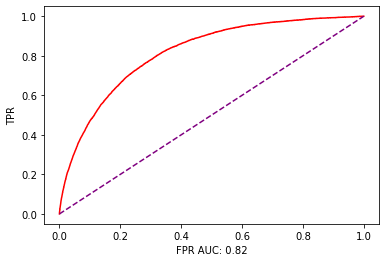

In [744]:
roc(y_test,y_pred_lr_prob)

# Tuning of Data 

In [722]:
final_data.shape

(319795, 18)

In [723]:
final_data['HeartDisease'].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [724]:
Data_Majority = final_data[final_data['HeartDisease']==0]

In [433]:
Data_Minority = final_data[final_data['HeartDisease']==1]


In [435]:
Data_No = Data_Majority.sample(n=30000)

In [436]:
final_data1 = pd.concat([Data_Minority,Data_No],axis=0)

In [437]:
final_data1.shape

(57373, 18)

In [438]:
final_data1.head()

,BMI_scaled,PhysicalHealth_scaled,MentalHealth_scaled,SleepTime_scaled,HeartDisease,Smoking,AlcoholDrinking,Stroke,WalkingDifficulty,Gender,AgeCategory,Origin,Diabetic,Exercise,GenHealth,Asthma,KidneyDisease,Cancer
5,0.124909,2.014054,-0.645307,2.976925,1,2,0,0,1,0,2,1,0,0,2,0,0,0
10,1.066388,2.014054,-0.645307,2.976925,1,2,0,0,1,1,1,0,2,0,2,1,0,0
35,0.837520,2.014054,-0.645307,-2.340291,1,2,0,1,1,1,2,0,2,1,2,0,0,1
42,-0.535687,-0.580460,-0.645307,-0.061484,1,0,0,0,1,0,2,0,2,0,1,0,0,1
43,0.360712,2.014054,0.041988,0.698118,1,2,0,0,1,0,2,0,2,1,2,0,1,0


In [440]:
final_df = final_data1.reset_index(drop=True)

In [467]:
final_df.head()

,BMI_scaled,PhysicalHealth_scaled,MentalHealth_scaled,SleepTime_scaled,HeartDisease,Smoking,AlcoholDrinking,Stroke,WalkingDifficulty,Gender,AgeCategory,Origin,Diabetic,Exercise,GenHealth,Asthma,KidneyDisease,Cancer
0,0.124909,2.014054,-0.645307,2.976925,1,2,0,0,1,0,2,1,0,0,2,0,0,0
1,1.066388,2.014054,-0.645307,2.976925,1,2,0,0,1,1,1,0,2,0,2,1,0,0
2,0.837520,2.014054,-0.645307,-2.340291,1,2,0,1,1,1,2,0,2,1,2,0,0,1
3,-0.535687,-0.580460,-0.645307,-0.061484,1,0,0,0,1,0,2,0,2,0,1,0,0,1
4,0.360712,2.014054,0.041988,0.698118,1,2,0,0,1,0,2,0,2,1,2,0,1,0


# Inference
* As data balancing did not worked for our dataset. So, we decided to tune our dataset according our target variable  heart disease which consist of 90% - ‘NO’ and 10% - ‘Yes’
* We divided our target variable into Majority class(representing all zeros in the target variable) and minority class(representing all ones in the target variable)
* Then we selected a random sample of 30000 from our majority data and created  a data frame  and concatenated minority class data frame and random data frame. 
* This new Data frame created after concatenating is our final data frame on which we will perform our further modelling.
* Now, We will be applying models again.

# Base Model 

In [745]:
from statsmodels.api import Logit
import statsmodels.api as sma

In [746]:
x = final_df.drop(["HeartDisease"],axis =1)
y = final_df["HeartDisease"]

In [747]:
from sklearn.model_selection import train_test_split

In [748]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,train_size= 0.7 ,random_state=10)

In [749]:
x_train = sma.add_constant(xtrain)
x_test = sma.add_constant(xtest)

In [750]:
base_model = sma.Logit(ytrain,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.510383
         Iterations 6


In [751]:
print(base_model.summary())

                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                40161
Model:                          Logit   Df Residuals:                    40143
Method:                           MLE   Df Model:                           17
Date:                Thu, 22 Dec 2022   Pseudo R-squ.:                  0.2625
Time:                        05:02:17   Log-Likelihood:                -20498.
converged:                       True   LL-Null:                       -27793.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.0750      0.048    -63.843      0.000      -3.169      -2.981
BMI_scaled                0.0747      0.013      5.811      0.000       0.050       0.100
Physical

In [752]:
y_pred_prob = base_model.predict(x_test)

In [753]:
y_pred_prob

53900    0.566047
11678    0.735628
35398    0.359660
48582    0.507726
3584     0.519341
           ...   
5638     0.540213
31763    0.563945
44383    0.109684
43779    0.659008
14498    0.559636
Length: 17212, dtype: float64

In [754]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score,cohen_kappa_score

In [755]:
y_pred = np.where(y_pred_prob>0.5,1,0)

In [756]:
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [757]:
def scores(actual,predicted):
    print('Confusion Metrics:\n',confusion_matrix(actual,predicted))
    print('Accuracy: ',accuracy_score(actual,predicted))
    print('Recall: ',recall_score(actual,predicted))
    print('Precision: ',precision_score(actual,predicted))
    print('F1 score: ',f1_score(actual,predicted))
    print('Cohen kappa Score: ',cohen_kappa_score(actual,predicted))
    print('Classification Summary:\n',classification_report(actual,predicted))


In [758]:
scores(ytest,y_pred)

Confusion Metrics:
 [[6819 2154]
 [2154 6085]]
Accuracy:  0.749709504996514
Recall:  0.7385605049156451
Precision:  0.7385605049156451
F1 score:  0.7385605049156451
Cohen kappa Score:  0.4985070111008675
Classification Summary:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76      8973
           1       0.74      0.74      0.74      8239

    accuracy                           0.75     17212
   macro avg       0.75      0.75      0.75     17212
weighted avg       0.75      0.75      0.75     17212



# Inference
* Pseudo R2 value is 0.2625 and pseudo R2 between (0.2-0.4 )indicates very good model fit. According to the P-value all the variables are significant.
* Recall, Precision is good and accuracy is also satisfactory.
* F1 score that represents harmonic mean of recall and precision is also good.
* Cohen-kappa score is Moderate. 
* But since it is our base model we will be making more models and tune data to get best results.

In [759]:
from sklearn.metrics import roc_auc_score, roc_curve

In [760]:
def roc(actual,pred_prob):
    fpr,tpr,thres = roc_curve(actual,pred_prob)
    plt.plot(fpr,tpr,color='r')
    plt.plot([0,1],[0,1],ls='--',color='purple')
    plt.xlabel('FPR AUC: %.2f'%roc_auc_score(actual,pred_prob))
    plt.ylabel('TPR')
    plt.show()

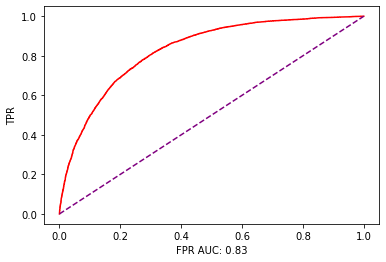

In [761]:
roc(ytest,y_pred_prob)

# Model 1 (Logistice Regression)

In [762]:
from sklearn.linear_model import LogisticRegression

In [763]:
model_lr = LogisticRegression()

In [764]:
model_lr.fit(xtrain,ytrain)

LogisticRegression()

In [765]:
y_pred_lr = model_lr.predict(xtest)

In [766]:
scores(ytest,y_pred_lr)

Confusion Metrics:
 [[6819 2154]
 [2154 6085]]
Accuracy:  0.749709504996514
Recall:  0.7385605049156451
Precision:  0.7385605049156451
F1 score:  0.7385605049156451
Cohen kappa Score:  0.4985070111008675
Classification Summary:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76      8973
           1       0.74      0.74      0.74      8239

    accuracy                           0.75     17212
   macro avg       0.75      0.75      0.75     17212
weighted avg       0.75      0.75      0.75     17212



# Inference
* Recall, Precision is good and accuracy is also satisfactory.
* F1 score that represents harmonic mean of recall and precision is also good.
* Cohen-kappa score is Moderate. 
* But since it is our base model we will be making more models and tune data to get best results.
* It is also giving similar results as Logit (base model)
* We will be mving forward for decision tree classifier.

In [769]:
y_pred_lr_prob = model_lr.predict_proba(xtest)[:,1]

In [770]:
y_pred_lr_prob

array([0.56601554, 0.73576421, 0.3597595 , ..., 0.10972836, 0.65896424,
       0.55958189])

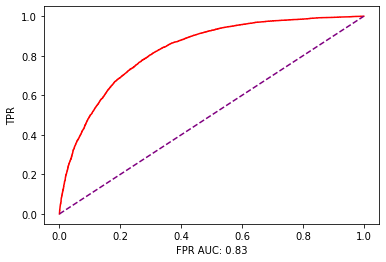

In [771]:
roc(ytest,y_pred_lr_prob)

# Model 2 (Decision Tree) 

In [772]:
from sklearn.tree import DecisionTreeClassifier , plot_tree

In [773]:
model_dt = DecisionTreeClassifier(max_depth=7)

In [774]:
model_dt.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=7)

In [775]:
# plt.figure(figsize=(30,10),dpi=160)
# plot_tree(model_dt,feature_names=xtrain.columns,class_names=['Yes','No'],fontsize=6)
# plt.show()

In [776]:
y_pred_dt = model_dt.predict(xtest)

In [777]:
scores(ytest,y_pred_dt)

Confusion Metrics:
 [[6553 2420]
 [1935 6304]]
Accuracy:  0.7469788519637462
Recall:  0.7651414006554194
Precision:  0.7226043099495644
F1 score:  0.7432647526970465
Cohen kappa Score:  0.49425342232268776
Classification Summary:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75      8973
           1       0.72      0.77      0.74      8239

    accuracy                           0.75     17212
   macro avg       0.75      0.75      0.75     17212
weighted avg       0.75      0.75      0.75     17212



# Inference
* Recall, Precision is good, there is a slight increase in recall 1.and accuracy is also satisfactory.
* F1 score that represents harmonic mean of recall and precision is also good.
* Cohen-kappa score is Moderate. 
* But since it is our base model we will be making more models and tune data to get best results.
* Since here Recall 1(i.e. are problem statement ) has increased slightly  So, this model is performing better than the previous model.
* But further we will be going for Random Forest Classifier.

In [778]:
y_pred_dt_prob = model_dt.predict_proba(xtest)[:,1]

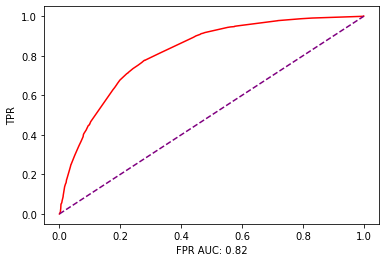

In [779]:
roc(ytest,y_pred_dt_prob)

# Model 3 (Random Forest)

In [780]:
from sklearn.ensemble import RandomForestClassifier

In [781]:
model_rf = RandomForestClassifier(n_estimators=700)

In [782]:
model_rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=700)

In [612]:
model_rf.score(xtest,ytest) # Performance of the model

0.7226934696723216

In [613]:
y_pred_rf = model_rf.predict(xtest)

In [614]:
scores(ytest,y_pred_rf)

Confusion Metrics:
 [[6395 2578]
 [2195 6044]]
Accuracy:  0.7226934696723216
Recall:  0.7335841728365093
Precision:  0.7009974483878451
F1 score:  0.7169207045845443
Cohen kappa Score:  0.4454309075789059
Classification Summary:
               precision    recall  f1-score   support

           0       0.74      0.71      0.73      8973
           1       0.70      0.73      0.72      8239

    accuracy                           0.72     17212
   macro avg       0.72      0.72      0.72     17212
weighted avg       0.72      0.72      0.72     17212



In [334]:
# Tuning the Random Forest Model

In [529]:
param = {"n_estimators":[100,200,300,500,700,900,1200],
         "max_depth":[4,5,6,7],
         "criterion":["entropy"]}

In [530]:
gscv = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param,cv=3,scoring="recall",verbose=3)

In [532]:
gscv.fit(xtrain,ytrain)

Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV 1/3] END criterion=entropy, max_depth=4, n_estimators=100;, score=0.723 total time=   0.5s
[CV 2/3] END criterion=entropy, max_depth=4, n_estimators=100;, score=0.714 total time=   0.5s
[CV 3/3] END criterion=entropy, max_depth=4, n_estimators=100;, score=0.684 total time=   0.5s
[CV 1/3] END criterion=entropy, max_depth=4, n_estimators=200;, score=0.693 total time=   1.1s
[CV 2/3] END criterion=entropy, max_depth=4, n_estimators=200;, score=0.670 total time=   1.1s
[CV 3/3] END criterion=entropy, max_depth=4, n_estimators=200;, score=0.670 total time=   1.1s
[CV 1/3] END criterion=entropy, max_depth=4, n_estimators=300;, score=0.705 total time=   1.7s
[CV 2/3] END criterion=entropy, max_depth=4, n_estimators=300;, score=0.713 total time=   1.7s
[CV 3/3] END criterion=entropy, max_depth=4, n_estimators=300;, score=0.725 total time=   1.7s
[CV 1/3] END criterion=entropy, max_depth=4, n_estimators=500;, score=0.716 total ti

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [4, 5, 6, 7],
                         'n_estimators': [100, 200, 300, 500, 700, 900, 1200]},
             scoring='recall', verbose=3)

In [533]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 700}

In [534]:
model_rf = RandomForestClassifier(**gscv.best_params_)

In [536]:
model_rf.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=700)

In [537]:
model_rf.score(xtest,ytest)

0.7539507320474088

In [538]:
y_pred_rf = model_rf.predict(xtest)

In [539]:
scores(ytest,y_pred_rf)

Confusion Metrics:
 [[6591 2382]
 [1853 6386]]
Accuracy:  0.7539507320474088
Recall:  0.775094064813691
Precision:  0.7283302919708029
F1 score:  0.7509848885752927
Cohen kappa Score:  0.5082961775942023
Classification Summary:
               precision    recall  f1-score   support

           0       0.78      0.73      0.76      8973
           1       0.73      0.78      0.75      8239

    accuracy                           0.75     17212
   macro avg       0.75      0.75      0.75     17212
weighted avg       0.76      0.75      0.75     17212



# Inference
* (After applying Parameter tuning with help of Grid Search CV)
* There is a increase in accuracy,recall,f1-score and cohen-kappa score.
* By far , the best results that we have got are from this model.
* We will move forward and apply Xgboost.

In [783]:
y_pred_rf_prob = model_rf.predict_proba(xtest)[:,1]

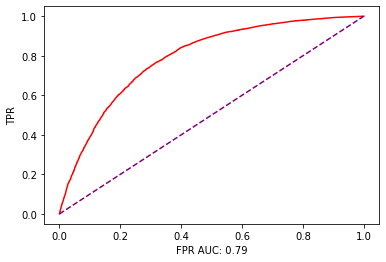

In [784]:
roc(ytest,y_pred_rf_prob)

# Model 4 (XG Boost)

In [785]:
from xgboost import XGBClassifier

In [572]:
model_xgb = XGBClassifier()

In [573]:
model_xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [574]:
y_pred_xgb = model_xgb.predict(xtest)

In [575]:
scores(ytest,y_pred_xgb)

Confusion Metrics:
 [[6595 2378]
 [1996 6243]]
Accuracy:  0.7458749709504997
Recall:  0.7577375895132904
Precision:  0.7241619301705139
F1 score:  0.7405693950177936
Cohen kappa Score:  0.4917877164943306
Classification Summary:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75      8973
           1       0.72      0.76      0.74      8239

    accuracy                           0.75     17212
   macro avg       0.75      0.75      0.75     17212
weighted avg       0.75      0.75      0.75     17212



In [580]:
param = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

In [583]:
gscv = GridSearchCV(estimator=XGBClassifier(),param_grid=param,cv=3,scoring="f1",verbose=3)

In [584]:
gscv.fit(xtrain,ytrain)

Fitting 3 folds for each of 210 candidates, totalling 630 fits
[CV 1/3] END gamma=0, learning_rate=0.1, max_depth=3;, score=0.745 total time=   0.2s
[CV 2/3] END gamma=0, learning_rate=0.1, max_depth=3;, score=0.748 total time=   0.2s
[CV 3/3] END gamma=0, learning_rate=0.1, max_depth=3;, score=0.747 total time=   0.2s
[CV 1/3] END gamma=0, learning_rate=0.1, max_depth=4;, score=0.746 total time=   0.3s
[CV 2/3] END gamma=0, learning_rate=0.1, max_depth=4;, score=0.749 total time=   0.3s
[CV 3/3] END gamma=0, learning_rate=0.1, max_depth=4;, score=0.746 total time=   0.3s
[CV 1/3] END gamma=0, learning_rate=0.1, max_depth=5;, score=0.745 total time=   0.4s
[CV 2/3] END gamma=0, learning_rate=0.1, max_depth=5;, score=0.750 total time=   0.4s
[CV 3/3] END gamma=0, learning_rate=0.1, max_depth=5;, score=0.748 total time=   0.4s
[CV 1/3] END gamma=0, learning_rate=0.1, max_depth=6;, score=0.743 total time=   0.5s
[CV 2/3] END gamma=0, learning_rate=0.1, max_depth=6;, score=0.749 total time

[CV 3/3] END gamma=0, learning_rate=0.5, max_depth=6;, score=0.726 total time=   0.5s
[CV 1/3] END gamma=0, learning_rate=0.5, max_depth=7;, score=0.714 total time=   0.6s
[CV 2/3] END gamma=0, learning_rate=0.5, max_depth=7;, score=0.719 total time=   0.5s
[CV 3/3] END gamma=0, learning_rate=0.5, max_depth=7;, score=0.717 total time=   0.6s
[CV 1/3] END gamma=0, learning_rate=0.5, max_depth=8;, score=0.707 total time=   0.7s
[CV 2/3] END gamma=0, learning_rate=0.5, max_depth=8;, score=0.710 total time=   0.7s
[CV 3/3] END gamma=0, learning_rate=0.5, max_depth=8;, score=0.714 total time=   0.8s
[CV 1/3] END gamma=0, learning_rate=0.5, max_depth=9;, score=0.706 total time=   0.8s
[CV 2/3] END gamma=0, learning_rate=0.5, max_depth=9;, score=0.701 total time=   0.8s
[CV 3/3] END gamma=0, learning_rate=0.5, max_depth=9;, score=0.715 total time=   0.8s
[CV 1/3] END gamma=0, learning_rate=0.6, max_depth=3;, score=0.744 total time=   0.2s
[CV 2/3] END gamma=0, learning_rate=0.6, max_depth=3;,

[CV 3/3] END gamma=1, learning_rate=0.4, max_depth=3;, score=0.745 total time=   0.2s
[CV 1/3] END gamma=1, learning_rate=0.4, max_depth=4;, score=0.747 total time=   0.2s
[CV 2/3] END gamma=1, learning_rate=0.4, max_depth=4;, score=0.745 total time=   0.2s
[CV 3/3] END gamma=1, learning_rate=0.4, max_depth=4;, score=0.744 total time=   0.3s
[CV 1/3] END gamma=1, learning_rate=0.4, max_depth=5;, score=0.736 total time=   0.4s
[CV 2/3] END gamma=1, learning_rate=0.4, max_depth=5;, score=0.742 total time=   0.3s
[CV 3/3] END gamma=1, learning_rate=0.4, max_depth=5;, score=0.741 total time=   0.3s
[CV 1/3] END gamma=1, learning_rate=0.4, max_depth=6;, score=0.742 total time=   0.4s
[CV 2/3] END gamma=1, learning_rate=0.4, max_depth=6;, score=0.731 total time=   0.5s
[CV 3/3] END gamma=1, learning_rate=0.4, max_depth=6;, score=0.734 total time=   0.5s
[CV 1/3] END gamma=1, learning_rate=0.4, max_depth=7;, score=0.728 total time=   0.5s
[CV 2/3] END gamma=1, learning_rate=0.4, max_depth=7;,

[CV 3/3] END gamma=2, learning_rate=0.2, max_depth=7;, score=0.745 total time=   0.6s
[CV 1/3] END gamma=2, learning_rate=0.2, max_depth=8;, score=0.734 total time=   0.8s
[CV 2/3] END gamma=2, learning_rate=0.2, max_depth=8;, score=0.743 total time=   0.7s
[CV 3/3] END gamma=2, learning_rate=0.2, max_depth=8;, score=0.744 total time=   0.6s
[CV 1/3] END gamma=2, learning_rate=0.2, max_depth=9;, score=0.735 total time=   1.0s
[CV 2/3] END gamma=2, learning_rate=0.2, max_depth=9;, score=0.740 total time=   1.0s
[CV 3/3] END gamma=2, learning_rate=0.2, max_depth=9;, score=0.737 total time=   0.7s
[CV 1/3] END gamma=2, learning_rate=0.3, max_depth=3;, score=0.746 total time=   0.2s
[CV 2/3] END gamma=2, learning_rate=0.3, max_depth=3;, score=0.750 total time=   0.2s
[CV 3/3] END gamma=2, learning_rate=0.3, max_depth=3;, score=0.750 total time=   0.3s
[CV 1/3] END gamma=2, learning_rate=0.3, max_depth=4;, score=0.743 total time=   0.4s
[CV 2/3] END gamma=2, learning_rate=0.3, max_depth=4;,

[CV 3/3] END gamma=3, learning_rate=0.1, max_depth=4;, score=0.746 total time=   0.3s
[CV 1/3] END gamma=3, learning_rate=0.1, max_depth=5;, score=0.747 total time=   0.4s
[CV 2/3] END gamma=3, learning_rate=0.1, max_depth=5;, score=0.750 total time=   0.4s
[CV 3/3] END gamma=3, learning_rate=0.1, max_depth=5;, score=0.750 total time=   0.3s
[CV 1/3] END gamma=3, learning_rate=0.1, max_depth=6;, score=0.743 total time=   0.5s
[CV 2/3] END gamma=3, learning_rate=0.1, max_depth=6;, score=0.750 total time=   0.5s
[CV 3/3] END gamma=3, learning_rate=0.1, max_depth=6;, score=0.749 total time=   0.5s
[CV 1/3] END gamma=3, learning_rate=0.1, max_depth=7;, score=0.743 total time=   0.5s
[CV 2/3] END gamma=3, learning_rate=0.1, max_depth=7;, score=0.747 total time=   0.6s
[CV 3/3] END gamma=3, learning_rate=0.1, max_depth=7;, score=0.745 total time=   0.6s
[CV 1/3] END gamma=3, learning_rate=0.1, max_depth=8;, score=0.739 total time=   0.7s
[CV 2/3] END gamma=3, learning_rate=0.1, max_depth=8;,

[CV 3/3] END gamma=3, learning_rate=0.5, max_depth=8;, score=0.738 total time=   0.9s
[CV 1/3] END gamma=3, learning_rate=0.5, max_depth=9;, score=0.723 total time=   1.2s
[CV 2/3] END gamma=3, learning_rate=0.5, max_depth=9;, score=0.736 total time=   1.0s
[CV 3/3] END gamma=3, learning_rate=0.5, max_depth=9;, score=0.730 total time=   1.0s
[CV 1/3] END gamma=3, learning_rate=0.6, max_depth=3;, score=0.747 total time=   0.3s
[CV 2/3] END gamma=3, learning_rate=0.6, max_depth=3;, score=0.745 total time=   0.2s
[CV 3/3] END gamma=3, learning_rate=0.6, max_depth=3;, score=0.745 total time=   0.2s
[CV 1/3] END gamma=3, learning_rate=0.6, max_depth=4;, score=0.741 total time=   0.3s
[CV 2/3] END gamma=3, learning_rate=0.6, max_depth=4;, score=0.746 total time=   0.3s
[CV 3/3] END gamma=3, learning_rate=0.6, max_depth=4;, score=0.743 total time=   0.3s
[CV 1/3] END gamma=3, learning_rate=0.6, max_depth=5;, score=0.736 total time=   0.3s
[CV 2/3] END gamma=3, learning_rate=0.6, max_depth=5;,

[CV 3/3] END gamma=4, learning_rate=0.4, max_depth=5;, score=0.746 total time=   0.4s
[CV 1/3] END gamma=4, learning_rate=0.4, max_depth=6;, score=0.740 total time=   0.5s
[CV 2/3] END gamma=4, learning_rate=0.4, max_depth=6;, score=0.744 total time=   0.4s
[CV 3/3] END gamma=4, learning_rate=0.4, max_depth=6;, score=0.744 total time=   0.4s
[CV 1/3] END gamma=4, learning_rate=0.4, max_depth=7;, score=0.737 total time=   0.6s
[CV 2/3] END gamma=4, learning_rate=0.4, max_depth=7;, score=0.749 total time=   0.5s
[CV 3/3] END gamma=4, learning_rate=0.4, max_depth=7;, score=0.745 total time=   0.5s
[CV 1/3] END gamma=4, learning_rate=0.4, max_depth=8;, score=0.738 total time=   0.6s
[CV 2/3] END gamma=4, learning_rate=0.4, max_depth=8;, score=0.747 total time=   0.5s
[CV 3/3] END gamma=4, learning_rate=0.4, max_depth=8;, score=0.743 total time=   0.6s
[CV 1/3] END gamma=4, learning_rate=0.4, max_depth=9;, score=0.734 total time=   0.7s
[CV 2/3] END gamma=4, learning_rate=0.4, max_depth=9;,

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 1, 2, 3, 4],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                         'max_depth': range(3, 10)},
             scoring='f1', verbose=3)

In [585]:
model_xgb = XGBClassifier(**gscv.best_params_)

In [586]:
model_xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=3, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [588]:
y_pred_xgb = model_xgb.predict(xtest)

In [589]:
scores(ytest,y_pred_xgb)

Confusion Metrics:
 [[6644 2329]
 [1887 6352]]
Accuracy:  0.7550546130606554
Recall:  0.7709673504066027
Precision:  0.7317129362976615
F1 score:  0.7508274231678488
Cohen kappa Score:  0.5102912224103084
Classification Summary:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76      8973
           1       0.73      0.77      0.75      8239

    accuracy                           0.76     17212
   macro avg       0.76      0.76      0.75     17212
weighted avg       0.76      0.76      0.76     17212



# Inference
* (After applying Parameter tuning with help of Grid Search CV)
* The outcome clearly shows accuracy,recall,f1-score and cohen-kappa score were the highest 
* Therefore, we can conclude that XGBOOST is giving the best results out of all models applied previously.

**HENCE OUR FINAL MODEL IS XGBOOST**

In [787]:
y_pred_xgb_prob = model_xgb.predict_proba(xtest)[:,1]

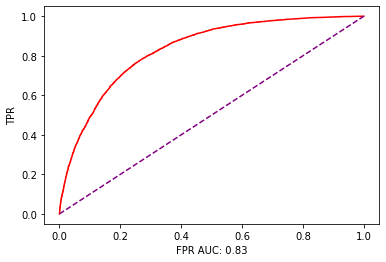

In [788]:
roc(ytest,y_pred_xgb_prob)